Berikut merupakan bagian import library. Pada kali ini library yang digunakan adalah tensorflow, keras, dan matplotlib.pyplot.
Kegunaan dari library tersebut adalah sebagai berikut. 
1. Tensorflow: berfungsi sebagai library untuk mengolah tipe data tensor. Tipe data tensor ini digunakan ketika proses training dan testing.
2. Keras: merupakan library yang menyimpan banyak package, namun pada kali ini keras digunakan untuk mengambil dataset citra benchmark bernama MNIST. Selain itu keras juga digunakan untuk import layer yang digunakan pada proses training.
3. Numpy: digunakan untuk pengolahan matriks.
4. Matplotlib.pyplot: berfungsi untuk plotting hasil training maupun testing.

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

Proses selanjutnya adalah import dataset citra yang telah disediakan oleh library keras. Setelah dataset di-import, dataset akan dipisahkan menjadi train dan test, begitu juga dengan label citra yang bersangkutan.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Setelah, dataset di import dan dipisahkan, selnajutnya adalah mendefinisikan nama kelas dari dataset yang telah disediakan. Dataset MNIST terdiri dari 10 kelas. Setiap nama kelas dapat diketahui dari code dibawah. 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Code dibawah berfungsi untuk mengetahui tipe data dan ukuran item di dalam dataset MNIST. Tipe data <class'numpy.ndarray'> berarti tipe data merupakn array atau matriks. Lalu ukuran train images(60000, 28, 28) berarti jumlah citra pada variable train_images berjumlah 60000 citra, dengan ukuran citra 28 baris *28 kolom. 

In [4]:
print("jenis train images :",type(train_images)) #Melihat jenis data  train_images
print("jenis train labels:",type(train_labels)) #melihat jenis data set train_labels
print("jenis test images :",type(test_images)) #Melihat jenis data set test_images
print("jenis test labels:",type(test_labels)) #melihat jenis data set test_labels
print("ukuran train images :",train_images.shape) #Melihat ukuran data set train_images
print("ukuran train labels :",train_labels.shape) #Melihat ukuran data set train_labels
print("ukuran test images :",test_images.shape) #Melihat ukuran data set test_images
print("ukuran test labels :",test_labels.shape) #Melihat ukuran data set test_labels

jenis train images : <class 'numpy.ndarray'>
jenis train labels: <class 'numpy.ndarray'>
jenis test images : <class 'numpy.ndarray'>
jenis test labels: <class 'numpy.ndarray'>
ukuran train images : (60000, 28, 28)
ukuran train labels : (60000,)
ukuran test images : (10000, 28, 28)
ukuran test labels : (10000,)


Untuk menyesuaikan input pada layer training, skala nilai pixel pada citra yang tadinya 0-255 akan diubah ke skala 0-1.

In [5]:
train_images = train_images / 255.0 #mengubah pixel gambar pada train images
test_images = test_images / 255.0 #mengubah pixel gambar pada test images

Langkah selanjutnya adalah inisisasi model. Kali ini model terdiri dari 3 layer. Fungsi yang digunakan adalah fungsi flatten sebagai input layer dan fungsi dense sebagai hidden dan output layer. 
1. Flatten: Flatten merupakan fungsi yang digunakan untuk merubah matriks nxn (pada kasus ini 28x28, menyesuaikan dengan ukuran matriks citra dataset) menjadi vektor 1xn atau nx1. 
2. Dense Hidden layer: merupakan layer tempat dimana proses training terjadi. Proses training menggunakan algoritma back propagation. Pada hidden layer ini terdapat 128 neuron, dan menggunakan fungsi aktivasi ReLU (Rectified Linear Unit). 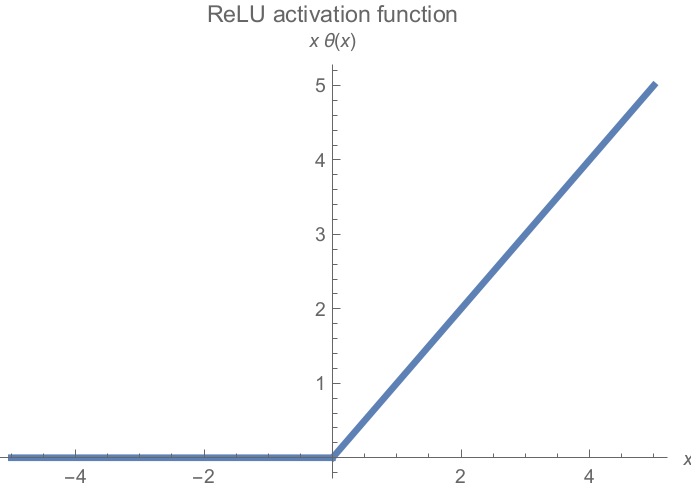

Dari grafik RelU dapat diketahui ketika hasil dari proses feed forward bernilai negatif maka akan dinormalisasi menjadi 0, sedangkan jika hasilnya positif akan bernilai bilangan tersebut.
3. Dense Output Layer: merupakan layer tempat dimana klasifikasi dilakukan. Layer tersebut terdiri dari 10 neuron karena menyesuaikan dengan jumlah output kelas pada dataset MNIST yang berjumlah 10. Pada klasifikasi ini digunakan fungsi aktifasi bernama softmax.
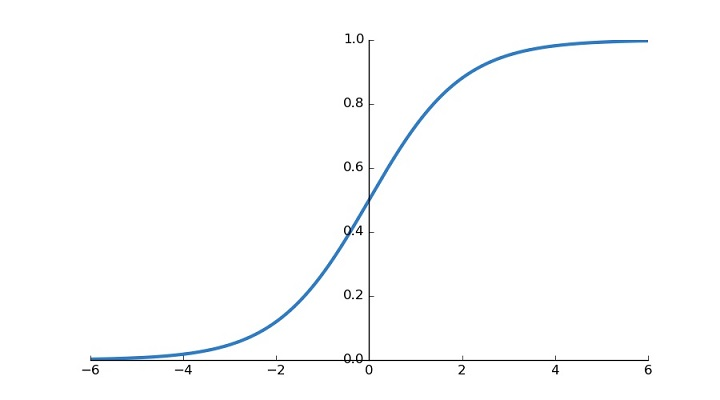

Layer softmax juga digunakan untuk normalisasi output dari hidden layer, dimana output yang sebelumnya dapat bernilai lebih dari 1, sedangkan pada teori probabilitas rentang nilai probabilitas hanya 0-1. Maka dari itu semua output dinormalisasi menggunakan softmax agar ketika semuanya dijumlahkan tidak lebih dari 1. Normalisasi menggunakan persamaan sebagai berikut: 
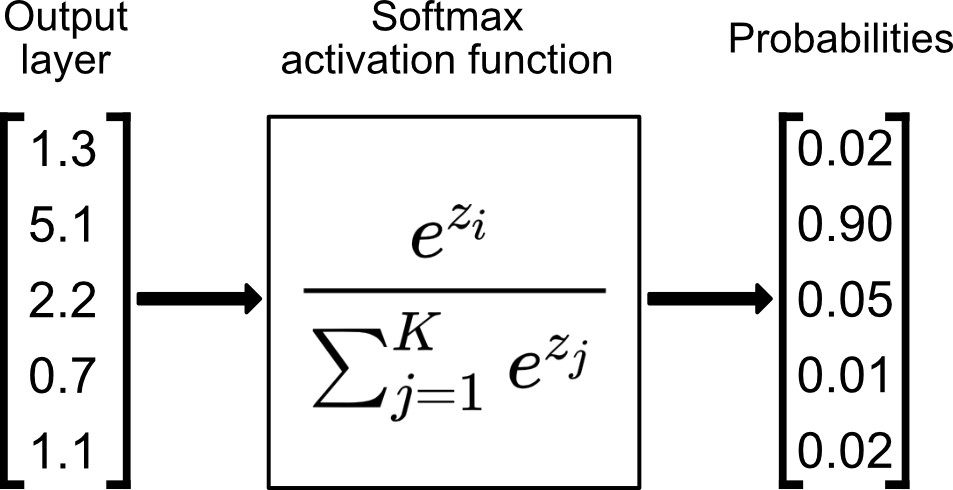


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #layer pertama
    keras.layers.Dense(128, activation='relu'), #layer kedua (memiliki 128 neuron)
    keras.layers.Dense(10, activation='softmax') #layer Output
])

Setelah dilakukan inisiasi model, maka langkah selanjutnya adalah men-compile model tersebut. Pada kasus ini model di-compile menggunakan optimizer bernama adam. Variabel loss berisi loss function yang digunakan, yaitu sparse categorical crossentropy. Loss function digunkan untuk menghitung loss pada setiap epoch pada training. Hasi dari loss function tersebut digunakan untuk men-update weight pada proses backpropagation. Persamaan crossentropy loss function adalah sebagai berikut: 

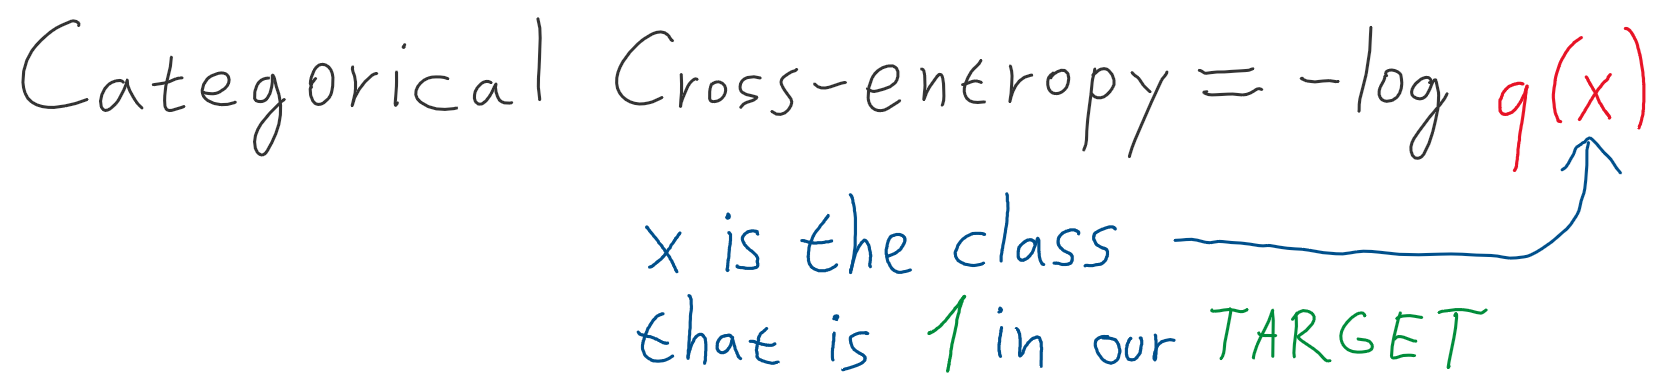

In [10]:
#Melakukan compile terhadap model 
model.compile(optimizer='adam', # memperbarui modelnya berdasarkan data yang dilihat dan berdasarkan loss function-nya
              loss='sparse_categorical_crossentropy', #Fungsi ini menghitung seberapa akurat model ketika proses training dilakukan.
              metrics=['accuracy'])#Bagian ini digunakan untuk memantau langkah-langkah dalam proses training dan testing.

Code di bawah merupakan proses training.

1. batch_size: merupakan jumlah citra yang diproses dalam 1 step.
2. epochs: jumlah iterasi atau perulangan saat proses training.
3. validation_split: presentase pembagian training_images untuk menjadi citra validasi.

Setelah training selesai, maka akurasi dan loss akan ditampilkan

In [11]:
hist=model.fit(train_images, train_labels,batch_size=256, epochs=20,validation_split = 0.2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6306 - accuracy: 0.7874 - val_loss: 0.4739 - val_accuracy: 0.8350
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8504 - val_loss: 0.4218 - val_accuracy: 0.8518
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8631 - val_loss: 0.3932 - val_accuracy: 0.8630
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3706 - accuracy: 0.8689 - val_loss: 0.3820 - val_accuracy: 0.8651
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8759 - val_loss: 0.4174 - val_accuracy: 0.8587
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8822 - val_loss: 0.3447 - val_accuracy: 0.8756
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8871 - val_loss: 0.3531 - val_accuracy: 0.8719
Epoch 

Selanjutnya adalah proses plotting dari hasil training yang telah dilakukan.

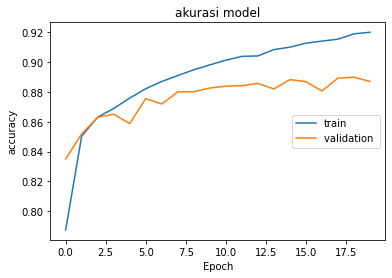

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('akurasi model')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation '],loc='center right')
plt.show()